In [3]:
import keras, os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from keras import regularizers
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from glob import glob
from IPython.display import display, Markdown, Latex
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
trainpaths=[]
for name in glob('/content/FruitRecognition/Fruits Classification/train/*', recursive=True):
  if not name.endswith('.zip'):
    trainpaths.append(name)
valpaths=[]
for name in glob('/content/FruitRecognition/Fruits Classification/valid/*', recursive=True):
  if not name.endswith('.zip'):
    valpaths.append(name)
testpaths=[]
for name in glob('/content/FruitRecognition/Fruits Classification/test/*', recursive=True):
  if not name.endswith('.zip'):
    testpaths.append(name)
print(trainpaths)
print(valpaths)
print(testpaths)

['/content/FruitRecognition/Fruits Classification/train/Strawberry', '/content/FruitRecognition/Fruits Classification/train/Grape', '/content/FruitRecognition/Fruits Classification/train/Banana', '/content/FruitRecognition/Fruits Classification/train/Apple', '/content/FruitRecognition/Fruits Classification/train/Mango']
['/content/FruitRecognition/Fruits Classification/valid/Strawberry', '/content/FruitRecognition/Fruits Classification/valid/Grape', '/content/FruitRecognition/Fruits Classification/valid/Banana', '/content/FruitRecognition/Fruits Classification/valid/Apple', '/content/FruitRecognition/Fruits Classification/valid/Mango']
['/content/FruitRecognition/Fruits Classification/test/Strawberry', '/content/FruitRecognition/Fruits Classification/test/Grape', '/content/FruitRecognition/Fruits Classification/test/Banana', '/content/FruitRecognition/Fruits Classification/test/Apple', '/content/FruitRecognition/Fruits Classification/test/Mango']


In [5]:
train_img_paths=[]
train_labels=[]
for i in trainpaths:
  for name in glob(i+'/*'):
    a=name.split('/')
    train_img_paths.append(name)
    train_labels.append(a[-2])

val_img_paths=[]
val_labels=[]
for i in valpaths:
  for name in glob(i+'/*'):
    a=name.split('/')
    val_img_paths.append(name)
    val_labels.append(a[-2])

test_img_paths=[]
test_labels=[]
for i in testpaths:
  for name in glob(i+'/*'):
    a=name.split('/')
    test_img_paths.append(name)
    test_labels.append(a[-2])

print(len(train_img_paths))
print(len(val_img_paths))
print(len(test_img_paths))
print(set(train_labels))

9700
200
100
{'Apple', 'Grape', 'Mango', 'Banana', 'Strawberry'}


#*Count Plot of Train data in data set:*

<Axes: xlabel='1', ylabel='count'>

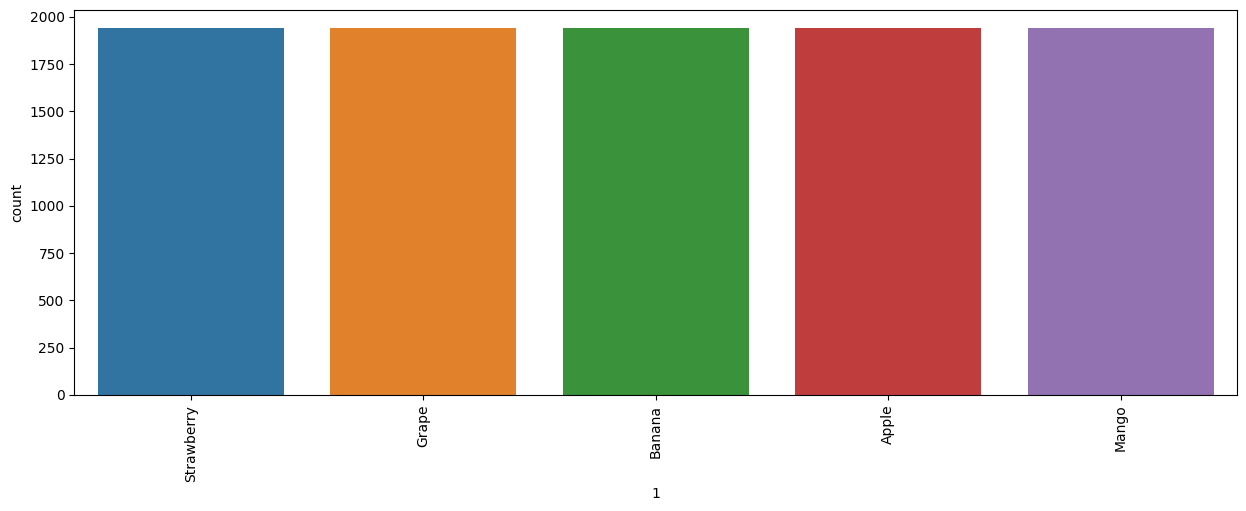

In [6]:
trainImgPath = pd.Series(train_img_paths).astype(str)
trainLabels=pd.Series(train_labels)
trainData = pd.concat([trainImgPath,trainLabels],axis=1)
display(Markdown("#*Count Plot of Train data in data set:*"))
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(x=trainData[1], order=trainData[1].value_counts().index)

#*Count Plot of Validation data in data set:*

<Axes: xlabel='1', ylabel='count'>

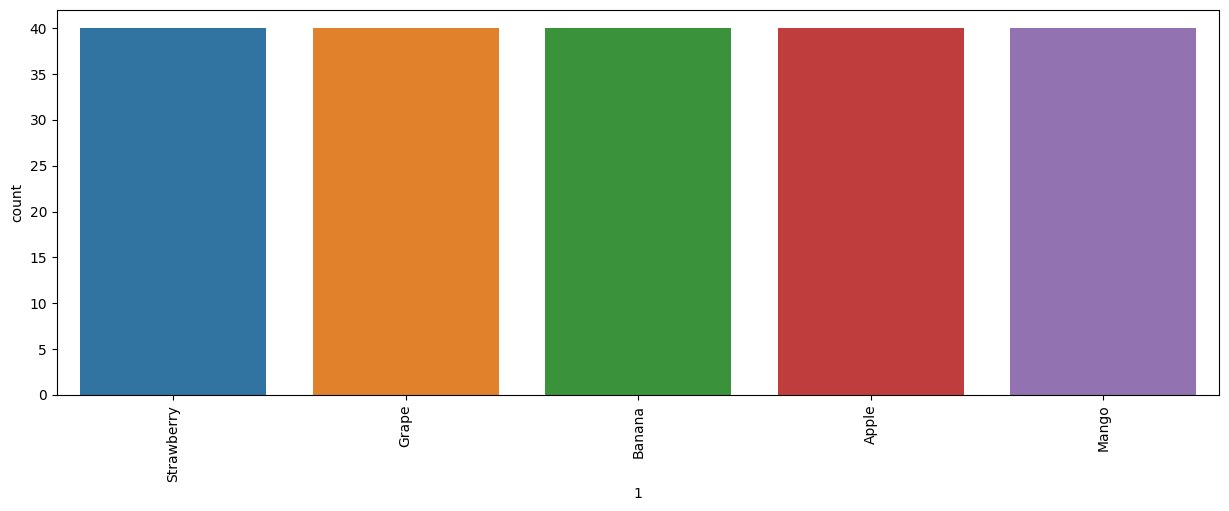

In [7]:
valImgPath = pd.Series(val_img_paths).astype(str)
valLabels=pd.Series(val_labels)
valData = pd.concat([valImgPath,valLabels],axis=1)
display(Markdown("#*Count Plot of Validation data in data set:*"))
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(x=valData[1], order=valData[1].value_counts().index)

#*Count Plot of Test data in data set:*

<Axes: xlabel='1', ylabel='count'>

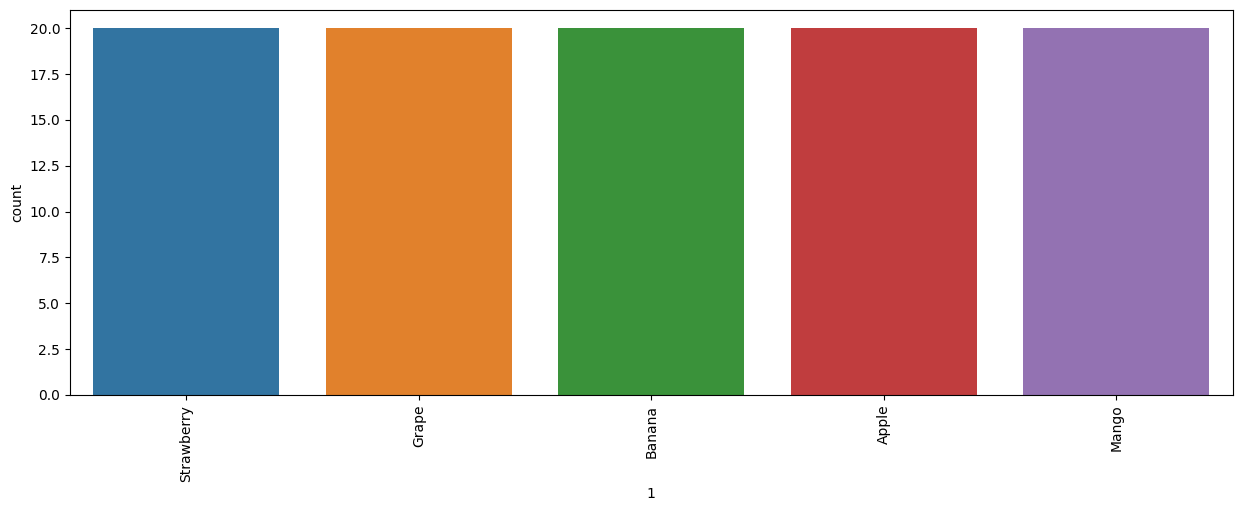

In [8]:
testImgPath = pd.Series(test_img_paths).astype(str)
testLabels=pd.Series(test_labels)
testData = pd.concat([testImgPath,testLabels],axis=1)
display(Markdown("#*Count Plot of Test data in data set:*"))
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(x=testData[1], order=testData[1].value_counts().index)

In [9]:
train_gen = ImageDataGenerator()
val_gen = ImageDataGenerator()
test_gen = ImageDataGenerator()

train_data = train_gen.flow_from_dataframe(
    dataframe = trainData,
    x_col = 0,
    y_col = 1,
    target_size = (224,224),
    color_mode = 'rgb',
    class_mode = 'categorical',
    shuffle = True
)

val_data = val_gen.flow_from_dataframe(
    dataframe = valData,
    x_col = 0,
    y_col = 1,
    target_size = (224,224),
    color_mode = 'rgb',
    class_mode = 'categorical',
    shuffle = True
)

test_data = test_gen.flow_from_dataframe(
    dataframe = testData,
    x_col = 0,
    y_col = 1,
    target_size = (224,224),
    color_mode = 'rgb',
    class_mode = 'categorical',
    shuffle = False
)

Found 9700 validated image filenames belonging to 5 classes.
Found 200 validated image filenames belonging to 5 classes.
Found 100 validated image filenames belonging to 5 classes.


In [10]:
model = Sequential()
model.add(Conv2D(input_shape=(224,224,3),filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
model.add(MaxPool2D(pool_size=(2,2),strides=(2,2)))
model.add(Flatten())
model.add(Dense(units=4096,activation="relu", activity_regularizer=regularizers.L2(0.0001)))
model.add(Dense(units=1000,activation="relu"))
model.add(Dense(units=5, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 64)      1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 224, 224, 64)      36928     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 112, 112, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 112, 112, 128)     73856     
                                                                 
 conv2d_3 (Conv2D)           (None, 112, 112, 128)     147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 56, 56, 128)      0         
 2D)                                                    

In [11]:
model.compile(
    optimizer = tf.optimizers.SGD(learning_rate=0.01),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
history1 = model.fit(train_data,epochs=10,validation_data=val_data)

Epoch 1/10
304/304 [==============================] - 162s 441ms/step - loss: 1.5901 - accuracy: 0.2684 - val_loss: 1.5404 - val_accuracy: 0.2600
Epoch 2/10
304/304 [==============================] - 137s 449ms/step - loss: 1.3701 - accuracy: 0.4011 - val_loss: 1.1672 - val_accuracy: 0.5250
Epoch 3/10
304/304 [==============================] - 137s 449ms/step - loss: 1.1790 - accuracy: 0.5002 - val_loss: 1.1076 - val_accuracy: 0.5200
Epoch 4/10
304/304 [==============================] - 137s 449ms/step - loss: 1.1386 - accuracy: 0.5225 - val_loss: 1.1871 - val_accuracy: 0.4900
Epoch 5/10
304/304 [==============================] - 137s 452ms/step - loss: 1.0715 - accuracy: 0.5499 - val_loss: 1.2055 - val_accuracy: 0.4750
Epoch 6/10
304/304 [==============================] - 137s 451ms/step - loss: 1.1206 - accuracy: 0.5345 - val_loss: 1.2697 - val_accuracy: 0.4400
Epoch 7/10
304/304 [==============================] - 136s 447ms/step - loss: 1.1365 - accuracy: 0.5201 - val_loss: 1.0646 -

In [14]:
history2 = model.fit(train_data,epochs=10,validation_data=val_data)

Epoch 1/10
304/304 [==============================] - 137s 451ms/step - loss: 0.9631 - accuracy: 0.6144 - val_loss: 1.0758 - val_accuracy: 0.5650
Epoch 2/10
304/304 [==============================] - 137s 449ms/step - loss: 0.8963 - accuracy: 0.6452 - val_loss: 0.9019 - val_accuracy: 0.6200
Epoch 3/10
304/304 [==============================] - 137s 449ms/step - loss: 0.8246 - accuracy: 0.6772 - val_loss: 0.9328 - val_accuracy: 0.5850
Epoch 4/10
304/304 [==============================] - 137s 450ms/step - loss: 0.7817 - accuracy: 0.6948 - val_loss: 0.8815 - val_accuracy: 0.6400
Epoch 5/10
304/304 [==============================] - 137s 450ms/step - loss: 0.6876 - accuracy: 0.7471 - val_loss: 0.9513 - val_accuracy: 0.6400
Epoch 6/10
304/304 [==============================] - 137s 449ms/step - loss: 0.6298 - accuracy: 0.7741 - val_loss: 0.9288 - val_accuracy: 0.6400
Epoch 7/10
304/304 [==============================] - 137s 451ms/step - loss: 0.5744 - accuracy: 0.8046 - val_loss: 0.9556 -

In [15]:
history3 = model.fit(train_data,epochs=5,validation_data=val_data)

Epoch 1/5
304/304 [==============================] - 138s 452ms/step - loss: 0.2357 - accuracy: 0.9439 - val_loss: 1.0779 - val_accuracy: 0.6600
Epoch 2/5
304/304 [==============================] - 137s 451ms/step - loss: 0.1929 - accuracy: 0.9600 - val_loss: 1.0770 - val_accuracy: 0.6850
Epoch 3/5
304/304 [==============================] - 137s 452ms/step - loss: 0.1234 - accuracy: 0.9835 - val_loss: 1.1520 - val_accuracy: 0.7200
Epoch 4/5
304/304 [==============================] - 138s 453ms/step - loss: 0.0929 - accuracy: 0.9903 - val_loss: 1.0304 - val_accuracy: 0.7050
Epoch 5/5
304/304 [==============================] - 137s 452ms/step - loss: 0.0590 - accuracy: 0.9975 - val_loss: 1.0429 - val_accuracy: 0.7150


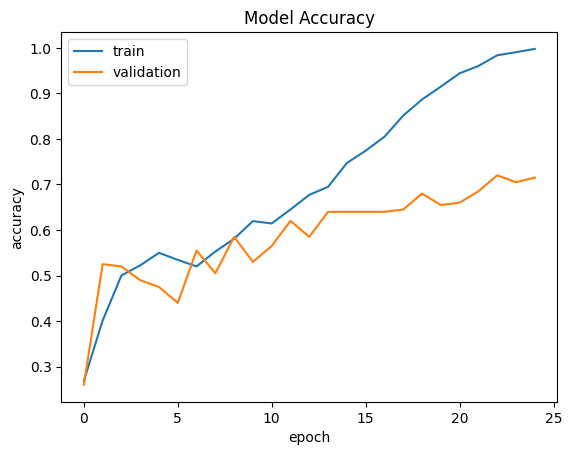

In [16]:
plt.plot(history1.history['accuracy']+history2.history['accuracy']+history3.history['accuracy'])
plt.plot(history1.history['val_accuracy']+history2.history['val_accuracy']+history3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

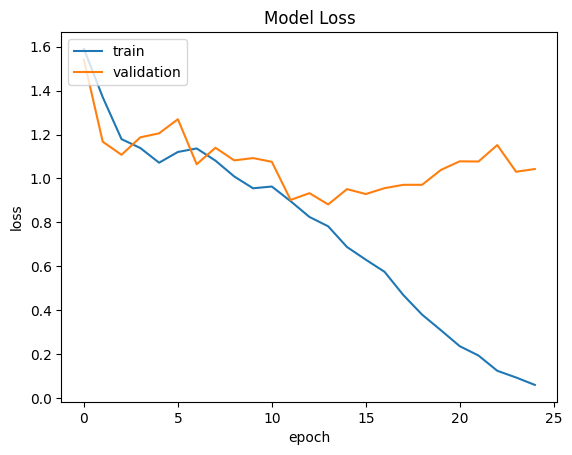

In [17]:
plt.plot(history1.history['loss']+history2.history['loss']+history3.history['loss'])
plt.plot(history1.history['val_loss']+history2.history['val_loss']+history3.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [18]:
pred = model.predict(test_data)
pred = np.argmax(pred,axis=1)
print(classification_report(test_data.labels,pred))

4/4 [==============================] - 1s 138ms/step
              precision    recall  f1-score   support

           0       0.60      0.45      0.51        20
           1       0.64      0.70      0.67        20
           2       0.81      0.85      0.83        20
           3       0.72      0.65      0.68        20
           4       0.67      0.80      0.73        20

    accuracy                           0.69       100
   macro avg       0.69      0.69      0.68       100
weighted avg       0.69      0.69      0.68       100



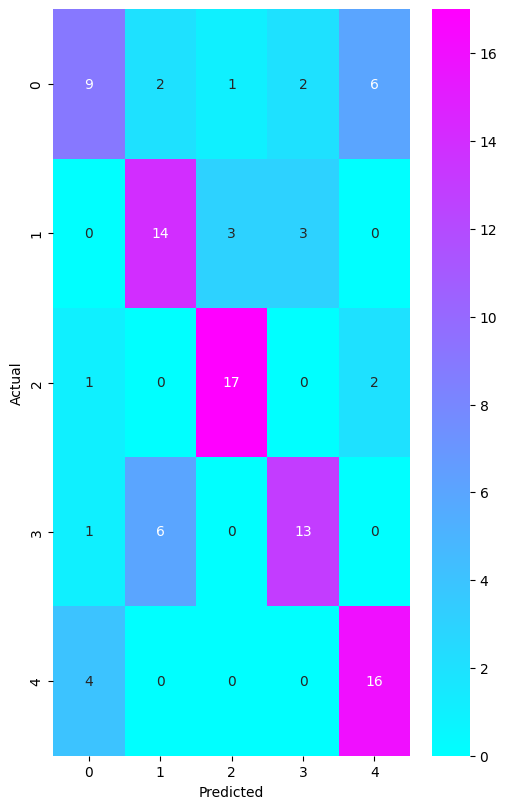

In [20]:
classes=[i for i in range(5)]
con_mat_df = pd.DataFrame(confusion_matrix(test_data.labels,pred),
                     index = classes, 
                     columns = classes)
figure = plt.figure(figsize=(5, 8))
sns.heatmap(con_mat_df, annot=True,cmap=plt.cm.cool,fmt='d')
plt.tight_layout()
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [21]:
model_json = model.to_json()
with open("/content/modelv2_0.json", "w") as json_file:
    json_file.write(model_json)
model.save_weights("/content/modelv2_0.h5")
print("Saved model to disk")

Saved model to disk


In [24]:
train_data.class_indices

{'Apple': 0, 'Banana': 1, 'Grape': 2, 'Mango': 3, 'Strawberry': 4}

In [28]:
from skimage import io
#plt.imshow()
img = cv2.resize(io.imread("https://upload.wikimedia.org/wikipedia/commons/9/90/Hapus_Mango.jpg"),(224,224))
img = np.expand_dims(img, axis=0)
model.predict(img)

1/1 [==============================] - 0s 19ms/step


array([[8.7435292e-05, 3.3485355e-06, 7.8257661e-05, 9.9982882e-01,
        2.0839650e-06]], dtype=float32)